# Is easy access to guns leading to more gun deaths?
#### Authored By: Pragyan Sharma, Prerana Patil, Shriya Rao, Sonal Agrawal

---

Over the years, there has been a continuous increase in the number of incidents related to gun violence in the United States. In addition to killing hundreds of Americans, it has forced them to live in a continuous fear of the next shooting. Therefore, in order to understand the magnitude of everyday gun violence, we analyzed data on gun violence statistics and observed that:
<ul>
    <li>Among developed countries, <b>US leads other countries in gun ownership</b> and has the highest number of gun related homicides.</li>
         <li>Over the years, <b>grisly mass shootings and murder incidents involving use of assault weapons have been on the rise</b>. And, in most of these cases, guns were legally obtained.</li>
    <li>Across United States, there has been a continuous <b>increase in the number of gun related deaths</b>. However,there is a <b>significant difference between these numbers for US states that implement atleast one gun-control law as compared to US states with no gun-control laws</b>. The difference in death rate is significantly higher for states with bans related to assault weapons.</li>
</ul>

What could be the underlying reason that United States is an outlier on gun violence? There have been multiple researches which suggest that it is in large part due to the easy access Americans have to guns. 

In order to support this claim, we analyzed gun violence on three parameters.
<ul>
    <li>Where does United States stand as compared to other developed nations on gun violence?</li>
    <li>Is legal right to bear arms in United States responsible for increasing mass shooting incidents?</li>
    <li>Is there a relationship between gun related deaths and gun laws?</li>
</ul>
       

## 1. United States vs Other Developed Nations

With less than 5% of the world’s population, the United States is home to roughly 35–50 per cent of the world’s civilian-owned guns, heavily skewing the global geography of guns and any relative comparison. (Source: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list)

### Datasets and  Sources
**1. Gun Homicides and Gun Ownership Data from Guardian**: This dataset consists of guns related deaths and ownership details by country. Each row represents a country and details like average guns per 100 people, total guns owned by civilians, etc. (Source: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data)

**2. Developed Countries 2019 Data from World Population Review**: This dataset is a list of developed countries in the world ranked according to their growth rate and population. Source: http://worldpopulationreview.com/countries/developed-countries/

**Variables of interest**
    <ul>
      <li>Country: Name of the country </li>
      <li>% of homicides by guns: Percentage of homicides due to guns</li>
      <li>Homicide by gun rate per 100,000 pop: Number of homicides happened using guns per 100,000 population</li>
      <li>Address: Address where the mass shooting incident took place</li>
      <li>Average total all civilian gun: Average number of guns held by civilians</li>
      <li>Growth Rate: The rate at which a country is growing according to CIA</li>
    </ul>

    
**Limitations**
- Gun Homicides and Ownership Data is present only for small arms and not for all types of firearms
- While the website says that the google spreadsheet (Sources: UNODC & Small Arms Survey) displaying this data is updated every 5 mins, we do not know if the statistics for 'Number of homicides' & 'Average guns per 100 people' have been updated for the current years or not
- Some of the developed nations like United Kingdom and South Korea are not present in Gun Homicides and Gun Ownership Data

### Set Up and Process

Data cleaning, merging and transformation is done using Python in Jupyter notebook. The final dataset is used in Tableau for visualization.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data Cleaning

The dataset needs some processing before we start exploring and visualizing the dataset further.
- Renaming column names for efficient data handling
- Handling Null values
- Merging with the list of developed countries

Step 1: Reading in data for world crimes

In [3]:
dataset_url = "https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/datasets/"

In [4]:
world_crime = pd.read_csv(dataset_url + "world_crime.csv")
world_crime.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


Step 2: Renaming columns for efficient data handling

In [5]:
# Creating a new list of column names
cols = ['Country', 'Country_code', 'Source', '%_homi_gun', 'num_homi_gun', 'homi_gun_per100k', 'rank-rate_owner',\
        'avg_gun_per100', 'avg_tot_all_guns']
# Replacing the existing column names with new names saved in the list 'cols'
world_crime.columns = cols

Step 3: Handling Null values

In [6]:
#Checking columns with 'NA' values
world_crime.isna().sum()

Country              0
Country_code         1
Source              69
%_homi_gun          69
num_homi_gun        69
homi_gun_per100k    69
rank-rate_owner      9
avg_gun_per100       9
avg_tot_all_guns     9
dtype: int64

In [7]:
# Removing all the 'NA' values
world_crime = world_crime.dropna()
len(world_crime)

107

Step 4: Merging the crime data will all the countries and combining with a list of developed countries

In [8]:
# Reading in data for growth rates for all 'Developed' countries
developed_countries = pd.read_csv(dataset_url+"developed.csv")
developed_countries.head()

,cca2,name,area,pop2019,GrowthRate
0,US,United States,9372610,329093.110,1.007119
1,JP,Japan,377930,126854.745,0.997401
2,TR,Turkey,783562,82961.805,1.012756
3,DE,Germany,357114,82438.639,1.001764
4,GB,United Kingdom,242900,66959.016,1.005791


In [9]:
# Checking for NAs
developed_countries.isna().sum()

cca2          0
name          0
area          0
pop2019       0
GrowthRate    0
dtype: int64

Step 5: Merging world crime data with growth rate for developed nations in order to find the position of the United States as compared to other countries. We are using inner join because we want to see the data only for developed countries.

In [10]:
# Merging world crimes and growth rates dataset
world_crime_developed = world_crime.merge(developed_countries, how="inner", left_on="Country", right_on="name")
# Removing columns that are not required for the analysis
world_crime_developed.drop(columns = ['Source', 'cca2','name', 'area'], inplace = True)

### Final Dataset

In [11]:
world_crime_developed.to_csv("world_crime.csv") # writing in csv for visualizations
world_crime_developed.head()

,Country,Country_code,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,pop2019,GrowthRate
0,Australia,AU,11.5,30.0,0.14,42.0,15.0,3050000.0,25088.636,1.012772
1,Austria,AT,29.5,18.0,0.22,14.0,30.4,2500000.0,8766.201,1.001643
2,Belgium,BE,39.5,70.0,0.68,34.0,17.2,1800000.0,11562.784,1.005589
3,Canada,CA,32.0,173.0,0.51,13.0,30.8,9950000.0,37279.811,1.008823
4,Cyprus,CY,26.3,5.0,0.46,6.0,36.4,275000.0,1198.427,1.007856


### Exploration

Countries as per gun ownership rate

In [12]:
world_crime_developed.sort_values(by = 'rank-rate_owner')[:5]

,Country,Country_code,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,pop2019,GrowthRate
28,United States,US,60.0,9146.0,2.97,1.0,88.8,270000000.0,329093.110,1.007119
26,Switzerland,CH,72.2,57.0,0.77,3.0,45.7,3400000.0,8608.259,1.007517
8,Finland,FI,19.8,24.0,0.45,4.0,45.3,2400000.0,5561.389,1.003405
4,Cyprus,CY,26.3,5.0,0.46,6.0,36.4,275000.0,1198.427,1.007856
25,Sweden,SE,33.9,37.0,0.41,10.0,31.6,2800000.0,10053.135,1.007055


Countries by average number of all civilian owned guns

In [13]:
world_crime_developed.sort_values(by = 'avg_tot_all_guns', ascending = False)[:5]

,Country,Country_code,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,pop2019,GrowthRate
28,United States,US,60.0,9146.0,2.97,1.0,88.8,270000000.0,329093.110,1.007119
10,Germany,DE,26.3,158.0,0.19,15.0,30.3,25000000.0,82438.639,1.001764
9,France,FR,9.6,35.0,0.06,12.0,31.2,19000000.0,65480.710,1.003793
3,Canada,CA,32.0,173.0,0.51,13.0,30.8,9950000.0,37279.811,1.008823
27,Turkey,TR,16.9,535.0,0.77,52.0,12.5,9000000.0,82961.805,1.012756


### Analysis

**Graph 1**: This visualization is an improvement of the chart named "1) America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany" given in the [Vox](https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts) article. It indicates the number of gun related homicides per 1 million people for all developed nations. The variables used to plot this graph are Country and homi_gun_per100k in the world crime dataset. The dataset originally had number of homicides per 100K people. We changed it to homicides per 1 million people for relatability.

From this chart we can clearly see that United States is way ahead of other developed nations in terms of gun related homicides and is an <b>outlier on gun violence</b>. Number of homicides by guns per 1 million people in US(29.70) account for <b>almost 6 times as of Canada(5.10) and 16 times as of Germany(1.90)</b>. 
  

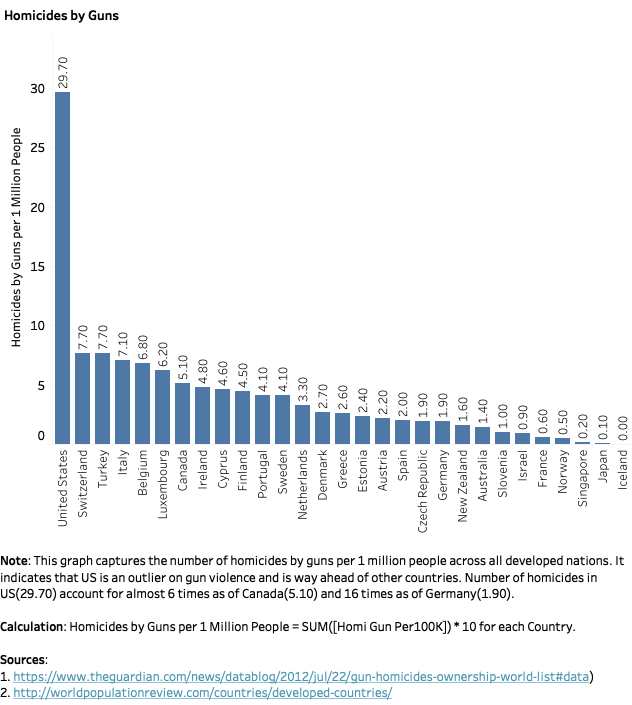

In [14]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/1_CountrywiseGunHomicides.png')

**Graph 2**: The below two visualizations compare the difference between the gun ownership and population statistics for the United States and the other developed nations. The variables used to plot this graph are country, population as of 2019 and  average of total number of guns.

It indicates that while <b>US accounts for only 33% of the total population among all developed nations</b>, it is home to <b>more than 70% of the total civilian owned guns among all the developed nations</b>.

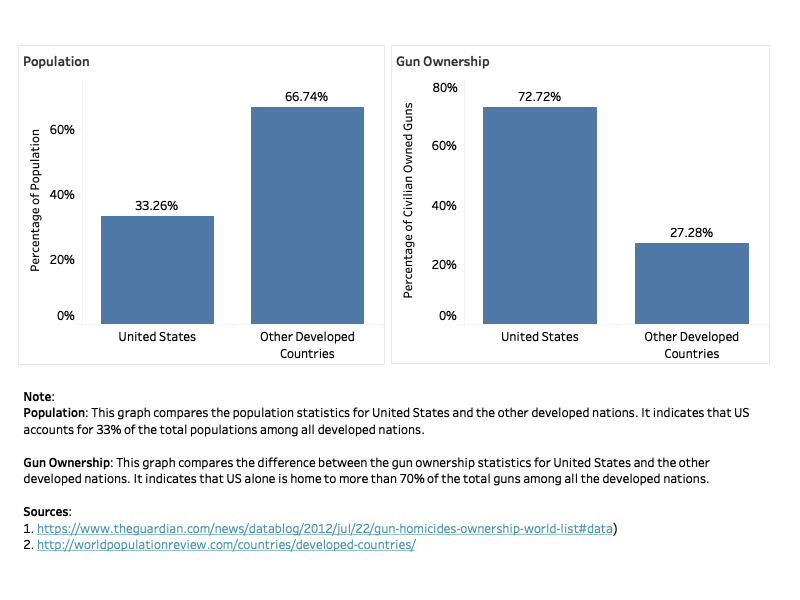

In [15]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/1_Population_GunOwnership.png')

**Graph 3**: This graph is a replication of chart given in [Vox](https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts) named "6) It’s not just the US: Developed countries with more guns also have more gun deaths". It showcases relationship between gun ownership and gun related deaths across developed nations. The variables used to plot this graph are country, homicides by gun per 100k population and average number of guns per 100K.

It indicates that <b>US is an outlier when compared to other developed nations. It witnesses more gun related deaths due to higher gun ownership</b>.

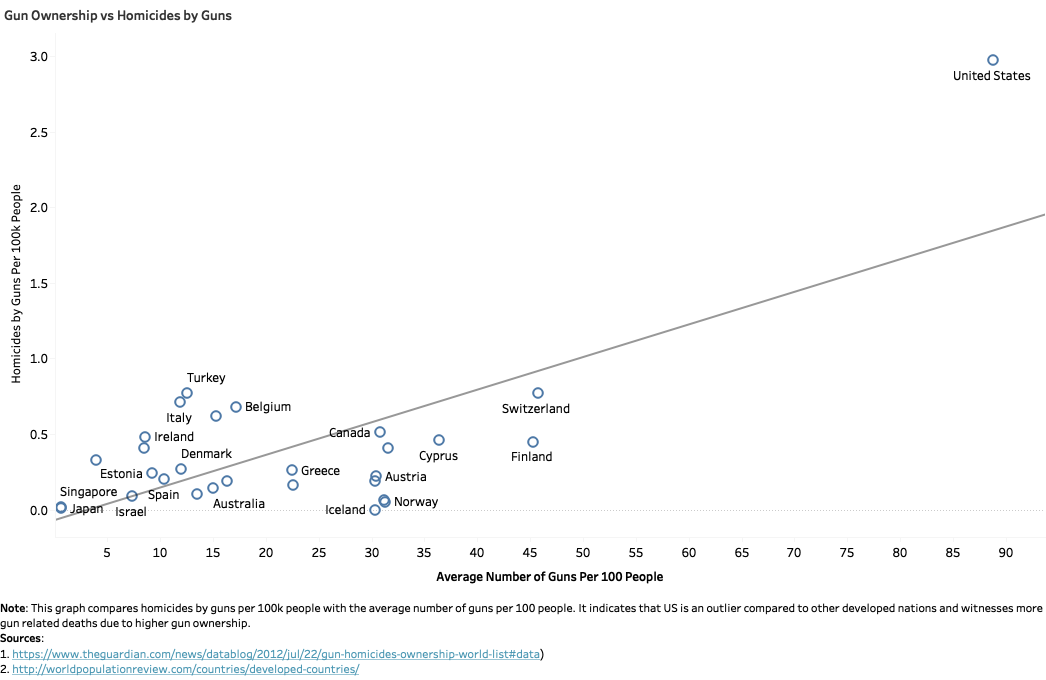

In [16]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/1_CountrywiseGunsper100vsHomicides.png')

### Dashboard 1

**Gun availability is a major risk factor for homicides in developed nations. This is supported by the dashboard below which indicates that a higher gun ownership in the United States is the reason for higher gun related deaths in the country.**

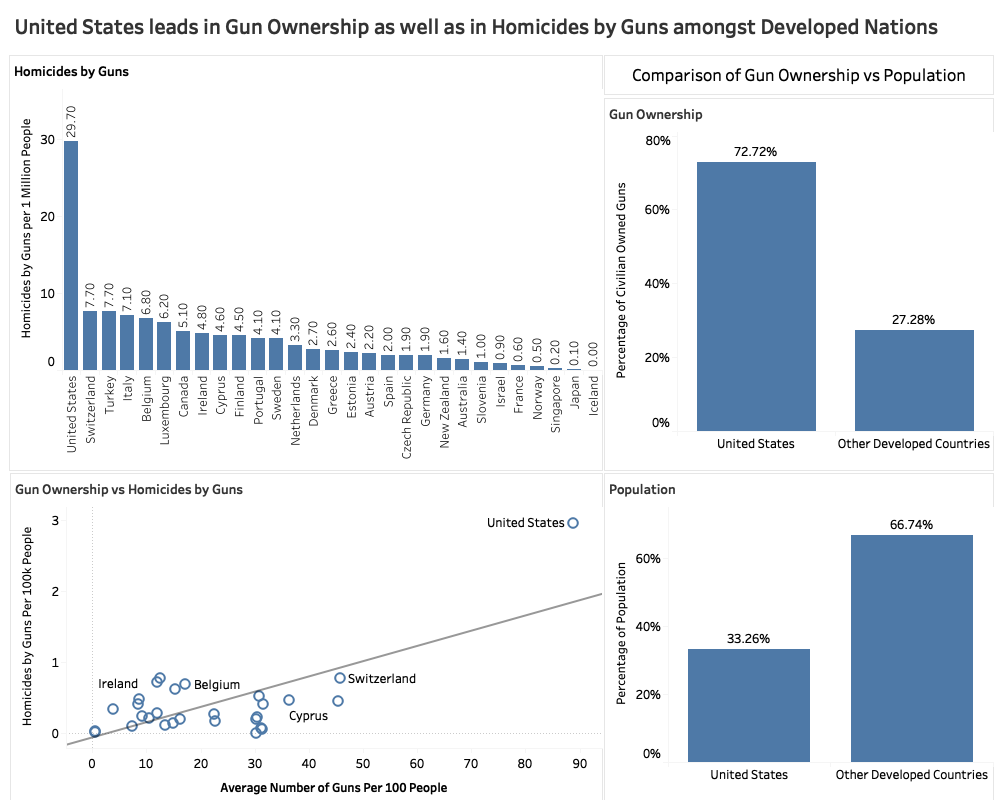

In [17]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/1_CountryAnalysis.png')

Tableau Public Link: https://public.tableau.com/profile/prerana7302#!/vizhome/Gun_Violence_in_United_States/CountryAnalysis

---

### 2. Mass Shootings

According to an article in New York Times, "More people died from firearm injuries in the United States in 2017 than in any other year since at least 1968, according to new data from the Centers for Disease Control and Prevention." (Source:  https://www.nytimes.com/2018/12/18/us/gun-deaths.html).

In fact, 2017 witnessed the highest number of mass shootings alone, killing and injuring hundreds of innocent lives.

### Datasets and Sources

**1.  Mass Shootings Data from Gun Violence Archive**: The dataset consists of gun violence incidents collected from Jan 01, 2013 to May 18, 2019. Each row of the dataset represents an incident in the United States with details regarding the incident location and number of people killed and injured. Source: https://www.gunviolencearchive.org/

**2. City Locations Data from Opensoft**: The dataset consists of US cities and their geographical locations. Each row represents a city and its geographical coordinates and details like population, timezone, etc. Source: https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/table/?sort=-rank

**3. Details of Mass Shootings from Mother Jones**: This dataset consists of details of mass shootings that took place from 1999 till date. Each row represents a mass shooting along with details shooters age, race, gender, weapons obtained legally, number of victims, etc. Source:https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

**Variables of Interest:**
- Incident Date: The date of the mass shooting incident
- State: State where the mass shooting incident took place
- City: City where the mass shooting incident took place
- Address: Address where the mass shooting incident took place
- num_Killed: Number of people killed in the mass shooting incident
- num_Injured: Number of people injured in the mass shooting incident
- Latitude: Latitude of the given city
- Longitude: Longitude of the given city
- Weapons obtained legally - Whether the weapon used for mass shooting was obtained legally or not 

    
**Limitations**
* City Locations Dataset has geolocations only for 1000 largest US cities based on population, so we lose the mass shootings information about some of the smaller cities

### Data Cleaning
This dataset is used for the intial exploration part to get a detailed understanding of the locations where mass shootings are occuring.
The dataset needs some preparation before we start exploring and visualizing the dataset further. Steps to be follwed are:
<ul>
  <li>Renaming columns for efficient data handling</li>
  <li> Creating new features e.g. month and year from date </li>
  <li>Adding latitude and longitude (geolocation) for each of the given locations for maps</li>
  <li>Handling Null values</li>
</ul>

 Sept 1: Reading and merging data for mass shootings from 2013 to 2019

In [18]:
dataset_url = "https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/datasets/"

In [19]:
y2013 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2013.csv")
y2014 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2014.csv")
y2015 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2015.csv")
y2016 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2016.csv")
y2017 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2017.csv")
y2018 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2018.csv")
y2019 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2019.csv")
# combining data for all the years 
mass_shoot = pd.concat([y2013, y2014, y2015, y2016, y2017, y2018, y2019])
mass_shoot.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2013",New York,Brooklyn,60 Glenmore Ave,0.0,6.0,NaN
1,"December 28, 2013",Alabama,Montgomery,954 Highland Ave,3.0,5.0,NaN
2,"December 26, 2013",Louisiana,Slidell,2144 First St,2.0,6.0,NaN
3,"December 26, 2013",Louisiana,Lockport,313 Tenth St,3.0,3.0,NaN
4,"December 25, 2013",New Jersey,Irvington,Nye Avenue and 21st Street,3.0,2.0,NaN


Step 2: Renaming columns for efficient data handling

In [20]:
mass_shoot.rename(columns={'Incident Date':'Date','City Or County':'City', '# Killed':'num_Killed', '# Injured':'num_Injured'}, inplace=True)

Step 3: Extracting Month and Year from the incident Date column

In [21]:
from datetime import datetime as dt
mass_shoot['Date']=pd.to_datetime(mass_shoot['Date'])
mass_shoot['Month'] = mass_shoot['Date'].dt.month
mass_shoot['Year'] = mass_shoot['Date'].dt.year

Step 4: Reading data for Latitudes and Longitudes for cities in the United States for plotting maps

In [22]:
cities_location = pd.read_csv(dataset_url+ "uscitiesv1.5.csv")
# Selecting relevant columns for further analysis
cities_location_sub = cities_location[['city','state_id', 'state_name','lat', 'lng']]
cities_location_sub.head()

,city,state_id,state_name,lat,lng
0,Prairie Ridge,WA,Washington,47.1443,-122.1408
1,Edison,WA,Washington,48.5602,-122.4311
2,Packwood,WA,Washington,46.6085,-121.6702
3,Wautauga Beach,WA,Washington,47.5862,-122.5482
4,Harper,WA,Washington,47.5207,-122.5196


Step 5: Merging mass shootings data with city locations to use with maps. Left join has been used to ensure we have all the data from mass_shoot.


In [23]:
# Merging datasets
mass_shooting_data = mass_shoot.merge(cities_location_sub,how='left', left_on=['City', 'State'], right_on=['city', 'state_name'])
# Dropping extra columns which we won't be using further
mass_shooting_data.drop(columns=['Operations', 'city', 'state_name','state_id'], inplace=True)

Step 6: Removing all the NA values

In [24]:
#Removing NA
mass_shooting_data = mass_shooting_data.dropna()
# Checking number of rows in the combined dataframe
len(mass_shooting_data)

1915

Weapons Obtained Legally Dataset is used for our final analysis as this contains more information about the weapons obtained legally, age, gender and race. This can help us analyse the demographics of the shooters and visualize whether weapons used are legal or not

In [25]:
weapons=pd.read_csv("https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/datasets/MASS1999.csv")
weapons.head(2)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Harry Pratt Co. warehouse shooting,"Aurora, IL",2/15/19,"Gary Martin, 45, went on a rampage inside the ...",5,6,11,Workplace,45,Yes,...,"Smith & Wesson handgun, with a green sighting ...",Black,M,https://www.washingtonpost.com/nation/2019/02/...,-,-,41.753725,-88.331057,Mass,2019
1,Pennsylvania hotel bar shooting,"State College, PA",1/24/19,"Jordan Witmer, 21, shot three people at a Rama...",3,1,4,Other,21,-,...,-,White,M,http://www.wistv.com/2019/01/26/details-emerge...,-,-,40.785142,-77.839411,Spree,2019


### Final Dataset

In [26]:
mass_shooting_data.head()

,Date,State,City,Address,num_Killed,num_Injured,Month,Year,lat,lng
0,2013-12-31,New York,Brooklyn,60 Glenmore Ave,0.0,6.0,12.0,2013.0,40.6501,-73.9496
1,2013-12-28,Alabama,Montgomery,954 Highland Ave,3.0,5.0,12.0,2013.0,32.3470,-86.2663
2,2013-12-26,Louisiana,Slidell,2144 First St,2.0,6.0,12.0,2013.0,30.2882,-89.7826
3,2013-12-26,Louisiana,Lockport,313 Tenth St,3.0,3.0,12.0,2013.0,29.6418,-90.5376
5,2013-12-25,New York,Medford,33A Cedarhurst Ave,1.0,3.0,12.0,2013.0,40.8220,-72.9859


In [27]:
mass_shooting_data.to_csv("mass_shootings.csv")

### Exploration

Cities that lost most number of lives in mass shootings

In [28]:
mass_shooting_data.groupby('City')['num_Killed','num_Injured'].sum()\
.reset_index().sort_values(by= 'num_Killed', ascending = False)[:5]                      

,City,num_Killed,num_Injured
106,Chicago,82.0,573.0
285,Las Vegas,72.0,488.0
389,Orlando,68.0,102.0
243,Houston,47.0,102.0
466,Saint Louis,37.0,148.0


In [29]:
mass_shooting_data.groupby('State')['num_Killed','num_Injured'].agg(['sum','count','mean','max'])

num_Killed                       num_Injured        \
                            sum count      mean   max         sum count   
State                                                                     
Alabama                    46.0    46  1.000000   5.0       183.0    46   
Alaska                      0.0     1  0.000000   0.0         6.0     1   
Arizona                    47.0    27  1.740741   5.0        89.0    27   
Arkansas                   20.0    18  1.111111   4.0        91.0    18   
California                236.0   223  1.058296  16.0       900.0   223   
Colorado                   23.0    21  1.095238   3.0        76.0    21   
Connecticut                 5.0    14  0.357143   2.0        72.0    14   
Delaware                    9.0    10  0.900000   5.0        38.0    10   
District of Columbia        8.0    30  0.266667   2.0       136.0    30   
Florida                   200.0   129  1.550388  50.0       558.0   129   
Georgia                    84.0    76  1.105263   6.0       286.0    76   
Illinois                  119.0   176  0.676136   6.0       741.0   176   
Indiana                    48.0    52  0.923077   5.0       193.0    52   
Iowa                        4.0     5  0.800000   2.0        18.0     5   
Kansas                     30.0    17  1.764706   5.0        65.0    17   
Kentucky                   30.0    26  1.153846   5.0       102.0    26   
Louisiana                  74.0    80  0.925000   5.0       356.0    80   
Maine                       9.0     2  4.500000   5.0         1.0     2   
Maryland                   52.0    52  1.000000   5.0       198.0    52   
Massachusetts               6.0    15  0.400000   1.0        65.0    15   
Michigan                   54.0    60  0.900000   6.0       242.0    60   
Minnesota                  11.0    16  0.687500   4.0        70.0    16   
Mississippi                49.0    32  1.531250   8.0       107.0    32   
Missouri                   64.0    65  0.984615   4.0       239.0    65   
Montana                     9.0     3  3.000000   5.0         5.0     3   
Nebraska                    6.0     7  0.857143   3.0        32.0     7   
Nevada                     72.0    17  4.235294  59.0       497.0    17   
New Jersey                 34.0    54  0.629630   4.0       216.0    54   
New Mexico                 32.0    13  2.461538   5.0        30.0    13   
New York                   46.0    79  0.582278   5.0       332.0    79   
North Carolina             46.0    53  0.867925   4.0       203.0    53   
Ohio                       74.0    66  1.121212   8.0       263.0    66   
Oklahoma                   22.0    21  1.047619   4.0        74.0    21   
Oregon                     15.0     6  2.500000  10.0        26.0     6   
Pennsylvania               76.0    79  0.962025  11.0       310.0    79   
Rhode Island                1.0     4  0.250000   1.0        16.0     4   
South Carolina             50.0    39  1.282051   9.0       145.0    39   
South Dakota               10.0     2  5.000000   6.0         1.0     2   
Tennessee                  54.0    77  0.701299   6.0       313.0    77   
Texas                     198.0   115  1.721739  10.0       411.0   115   
Utah                        9.0     3  3.000000   5.0         7.0     3   
Virginia                   40.0    46  0.869565   6.0       188.0    46   
Washington                 42.0    21  2.000000   5.0        58.0    21   
West Virginia               5.0     3  1.666667   4.0         9.0     3   
Wisconsin                  15.0    14  1.071429   5.0        47.0    14   

                                        
                           mean    max  
State                                   
Alabama                3.978261   12.0  
Alaska                 6.000000    6.0  
Arizona                3.296296    7.0  
Arkansas               5.055556   25.0  
California             4.035874   19.0  
Colorado               3.619048    9.0  
Connecticut            5.142857   13.0  
Delaware  

Number of lives lost in mass shootings by year

In [30]:
mass_shooting_data.groupby('Year')['num_Killed'].sum()\
.reset_index().sort_values(by= 'num_Killed', ascending = False) 

,Year,num_Killed
3,2016.0,411.0
4,2017.0,392.0
2,2015.0,332.0
5,2018.0,328.0
0,2013.0,249.0
1,2014.0,242.0
6,2019.0,130.0


### Analysis

**Graph 1**: This visualization is an adaptation from the chart named "3) There have been more than 1,600 mass shootings since Sandy Hook" in the [Vox](https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts) article. It shows the distribution of mass shootings in the United States. This helps us in identifying the states and locations where gun violence is relatively higher. The variables used are num of people Killed, Latitude and Longitude of the city where the mass shooting took place. We have changed the color from red to blue to keep it consistent with the other charts in the dashboard. 

We can clearly see that <b> mass shootings incidents are relatively higher in eastern states than western states.</b>

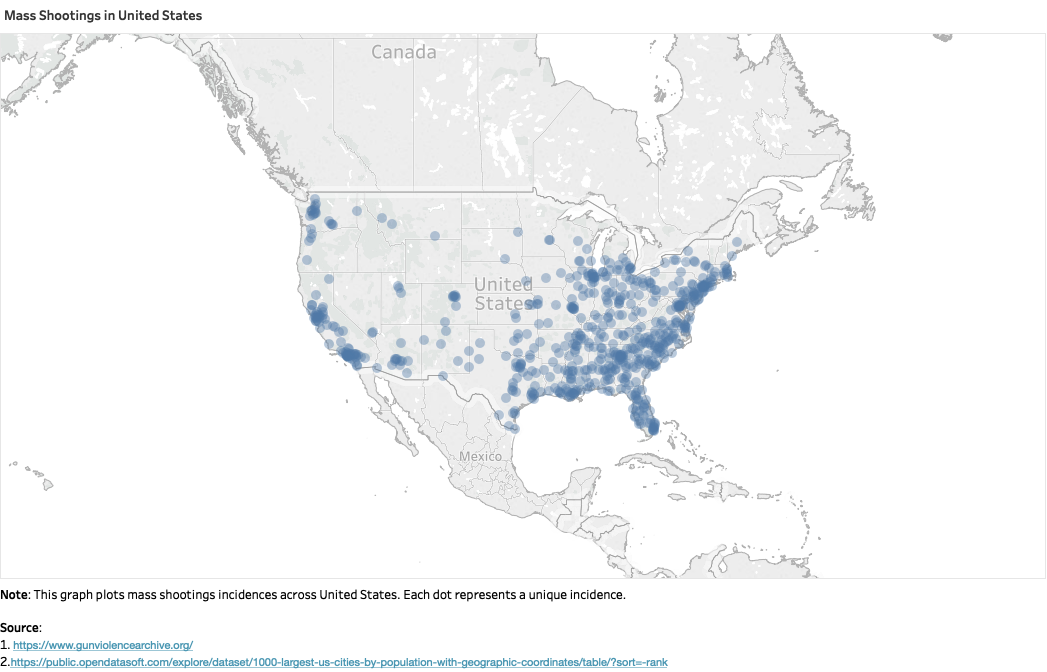

In [31]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/2_MassShootings.png')

**Graph 2**: This visualization helps in identifying the race of the shooters. Variables used are Race and Number of Shootings.

We can see that <b>more than 50% of the shootings are caused by whites</b>.

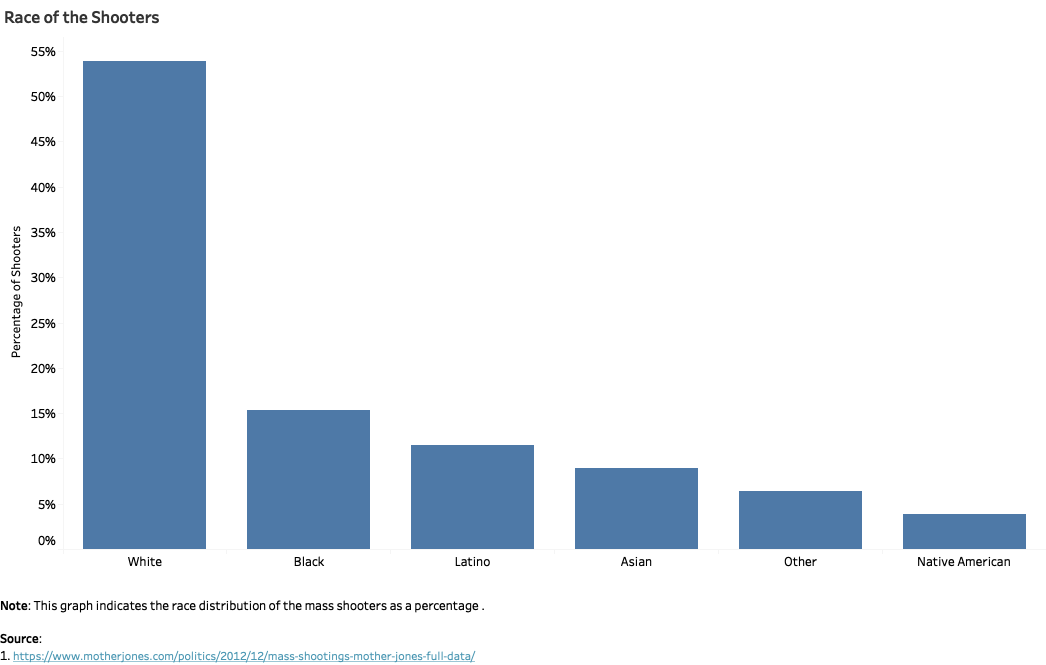

In [32]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/2_Race.png')

**Graph 3**: This visualization helps in identifying the genders of the shooters. Variables used are Gender and Number of Shootings.

We can see that <b>more than 95% of the mass shooting incidents are caused by men</b>.

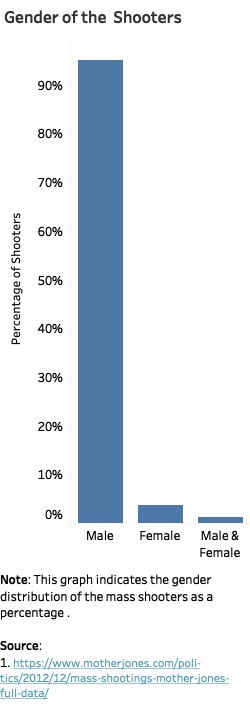

In [33]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/2_Gender.png')

**Graph 4**: This visualization helps in identifying whether the weapon used in mass shootings was obtained through legal channels or not.The variables used to plot this graph are Weapons Obtained Legally and Number of Mass Shootings.

We can see that <b>more than 70% of the weapons uesd in the mass shooting incidents were obtained legally.</b>

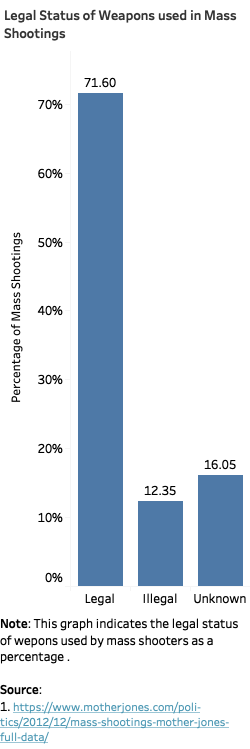

In [34]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/2_WeaponsLegalStatus.png')

### Dashboard 2

**Most of the mass shooters obtained weapons legally. This is supported by the Dashboard below which clearly depicts that  legal weapons were used for more than 70% of the shootings. Hence, we can further analyse if implementing stricter gun laws can make any difference.**

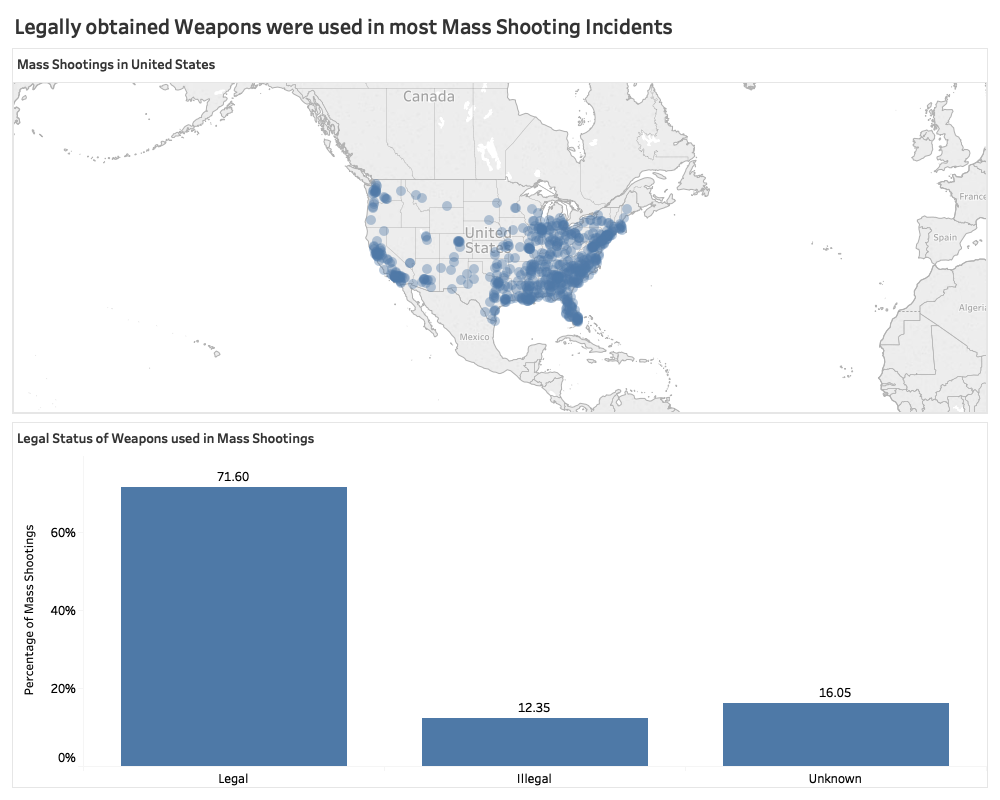

In [35]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/2_MassShootingsAnalysis.png')

Tableau Public Link: https://public.tableau.com/profile/prerana7302#!/vizhome/Gun_Violence_in_United_States/MassShootingsAnalysis

---

## 3. Gun Laws and Gun Deaths in United States

On an average 10 out of every 100,000 people are killed by firearms across the United States. And, it is commonly assumed that mental illness or stress levels are few of the major triggers. But, what about gun control laws? Might tighter gun control laws make a difference? Some studies indicate that they do.

Therefore, in this section, we are trying to analyze the relation of firearm related deaths with gun control restrictions by state. It includes states which have one of three gun control restrictions in place - assault weapons' bans, trigger locks, or safe storage requirements. (Source: https://www.theatlantic.com/national/archive/2011/01/the-geography-of-gun-deaths/69354/).

### Datasets and Sources
**1. Firearms Law from  Kaiser Family Foundation**: This dataset consists details of states with firearm laws designed to protect children. Each row represents whether, 'Child Access Prevention Firearm Law', 'Safe Storage Gun Lock Requirment' and 'Assault Weapons Ban' is present or not. (Source: https://www.kff.org/other/state-indicator/firearms-and-children-legislation/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)

**2. Firearms Deaths from  Kaiser Family Foundation**: This dataset consists number of deaths due to injury by firearms per 100,000 population in each state. (Source: https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=3&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)


**Variables of Interest:**
    <ul>
      <li>Firearm Child Protection: State laws in place designed to prevent children from accessing firearms </li>
      <li>Safe Storage or Gun Lock Requirment: State laws concerning firearms locking devices in place</li>
      <li>Assault Weapons Ban: State law banning assault weapons, by name, or by specific features of the gun that make a gun an assault weapon in place or not</li>
      <li>Firearms Death Rate per 100,000: Deaths rate to injury by firearms per 100,000 Population</li>
    </ul>
    
**Limitations**
 *  Firearms Laws dataset is only present for 2014 so the analysis is based on laws present only in 2014. Some states might have changed laws which could not be captured
 * State laws applies to assault pistols only
 * Deaths from injury due to firearms excludes deaths due to explosives and other causes indirectly caused by firearms.

### Data Cleaning

The dataset needs some processing before we start exploring and visualizing the dataset further. Steps to be followed are:
- Merging  'Firearms Deaths' data with  'Firearm Child Protection'
- Creating new columns for states which have at least one gun law present and states which have both Assault Weapons Ban and Safe Storage or Gun Lock Requirment present

Step 1: Reading  the datset for firearms and child protection

In [36]:
firearm_law = pd.read_csv(dataset_url + 'firearm_law.csv', skiprows = 2)

Step 2: Removing columns and rows that are not required for the analysis

In [37]:
firearm_law= firearm_law[~(firearm_law.Location == 'United States')]
firearm_law.drop(columns=['Footnotes'], inplace = True)

Step 3: Creating a new column At least One Law which has any of the laws implemented Child Access Prevention Firearm Law, Safe Storage or Gun Lock Requirment or Assault Weapons Ban

In [38]:
firearm_law['At least One Law']=((firearm_law['Child Access Prevention Firearm Law']=='Yes')|
                                                    (firearm_law['Safe Storage or Gun Lock Requirment']=='Yes')|
                                                    (firearm_law['Assault Weapons Ban']=='Yes'))*1

In [39]:
firearm_law['Weapon Laws']=((firearm_law['Safe Storage or Gun Lock Requirment']=='Yes')&
                            (firearm_law['Assault Weapons Ban']=='Yes'))*1
firearm_law['Weapon Laws'].replace({1:'Yes',0:'No'},inplace=True)

Step 3: Reading  the data for firearms death rate per year and combining into a datafile. Writing the data into a file.

In [40]:
#import pandas as pd
#import glob
#path = 'Firearm_Death_Rate'
#all_files = glob.glob(path + "/*.csv")
#li = []
#year = 1999
#for filename in all_files:
#    year_data = pd.read_csv(filename,skiprows =2 , index_col=None, header=0)[2:52]
#    year_data['Year'] = year
#    li.append(year_data)
#    year = year+1
#firearms_death_rate = pd.concat(li, axis=0, ignore_index=True)
#firearms_death_rate.to_csv('firearm_deathrate_1999to2017.csv')

Step 5: Reading  the dataset for firearms death rate

In [41]:
firearms_death_rate = pd.read_csv(dataset_url + 'firearm_deathrate_1999to2017.csv')
firearms_death_rate= firearms_death_rate[['Location','Firearms Death Rate per 100,000','Year']]

Step 6: Merging firearms child protection with firearms death data using inner join on state as we need information from both the datasets for our analysis

In [42]:
firearm_statelaws_deathrate = firearms_death_rate.merge(firearm_law, how="inner", left_on="Location", right_on="Location")

### Final Dataset

In [43]:
firearm_statelaws_deathrate.to_csv('firearm_statelaws_deathrate.csv')
firearm_statelaws_deathrate.head()

,Location,"Firearms Death Rate per 100,000",Year,Child Access Prevention Firearm Law,Safe Storage or Gun Lock Requirment,Assault Weapons Ban,At least One Law,Weapon Laws
0,Alaska,15.8,1999,No,No,No,0,No
1,Alaska,17.9,2000,No,No,No,0,No
2,Alaska,14.9,2001,No,No,No,0,No
3,Alaska,19.9,2002,No,No,No,0,No
4,Alaska,19.5,2003,No,No,No,0,No


### Exploration

Average death rate related to firearms when the gun laws are present vs not present

In [44]:
firearm_statelaws_deathrate.groupby('Child Access Prevention Firearm Law')['Firearms Death Rate per 100,000'].agg(['mean'])
firearm_statelaws_deathrate.groupby('Safe Storage or Gun Lock Requirment')['Firearms Death Rate per 100,000'].agg(['mean'])
firearm_statelaws_deathrate.groupby('Assault Weapons Ban')['Firearms Death Rate per 100,000'].agg(['mean'])
firearm_statelaws_deathrate.groupby('At least One Law')['Firearms Death Rate per 100,000'].agg(['mean'])

,mean
Child Access Prevention Firearm Law,
No,12.377990
Yes,10.475564


,mean
Safe Storage or Gun Lock Requirment,
No,12.365857
Yes,7.578469


,mean
Assault Weapons Ban,
No,12.040602
Yes,7.490789


,mean
At least One Law,
0,13.088012
1,10.313980


### Analysis

**Graph 1**: This graph shows the death rate trend in the States with and without Weapon Laws (Assault Weapons Ban and Safe Storage or Gun Lock Requirment). 
We can see there is **a rise in average death rate in states with no Weapon Laws while there is a slight dip in average death rate in states where Weapon Laws were implemented.**

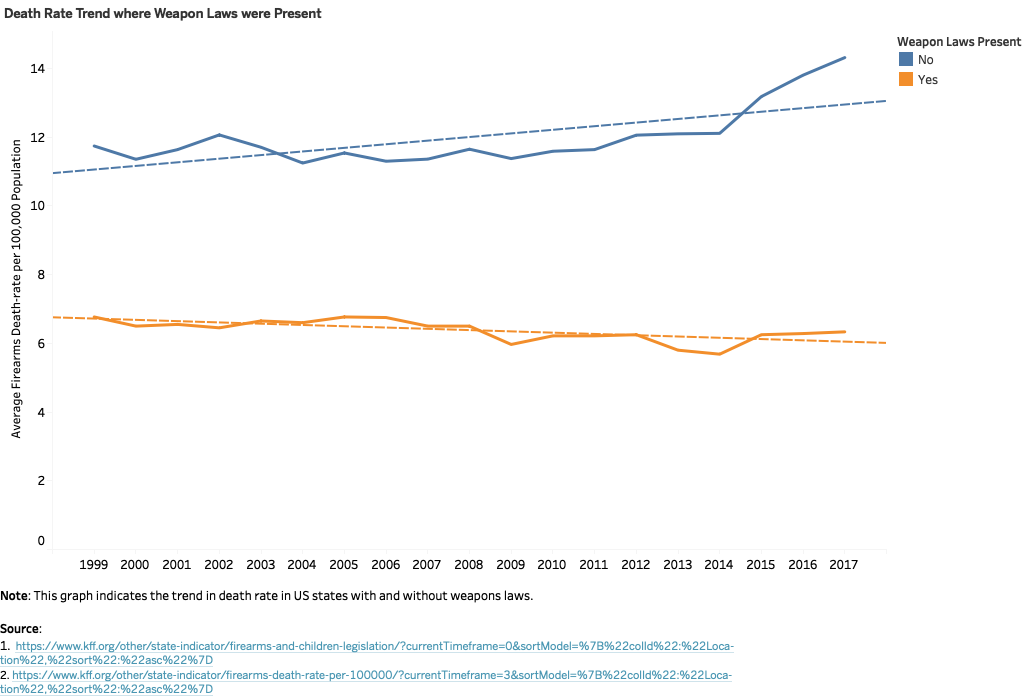

In [45]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/3_WeaponsBanTrend.png')

**Graph 2**: This graph indicates the sum of death rate per 100k people and compares that for US states with and without  Assault Weapons Ban. The variables used are Firearms Death Rate per 100,000 &  Assault Weapons Ban.

We can clearly see that the sum of gun death rate per 100k people is **significantly higher in states that implement no laws relating to Assault Weapons Ban.** 

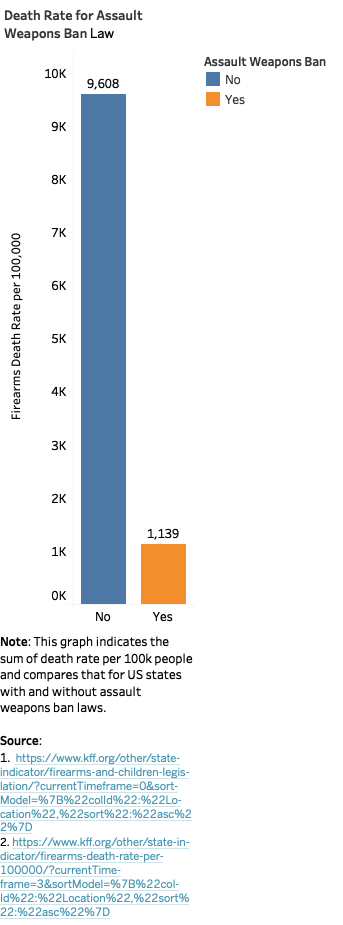

In [46]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/3_AssaultBanLawvsDeaths.png')

**Graph 3**: This graph indicates the sum of death rate per 100k people and compares that for US states with and without safe storage or gun locks laws. Key variables of interest are - Firearms Death Rate per 100,000 & Safe Storage or Gun Lock Requirement.

We can clearly see that the sum of gun death rate per 100k people is **significantly higher in states that implement no laws relating to Safe Storage or Gun Lock Requirement.**

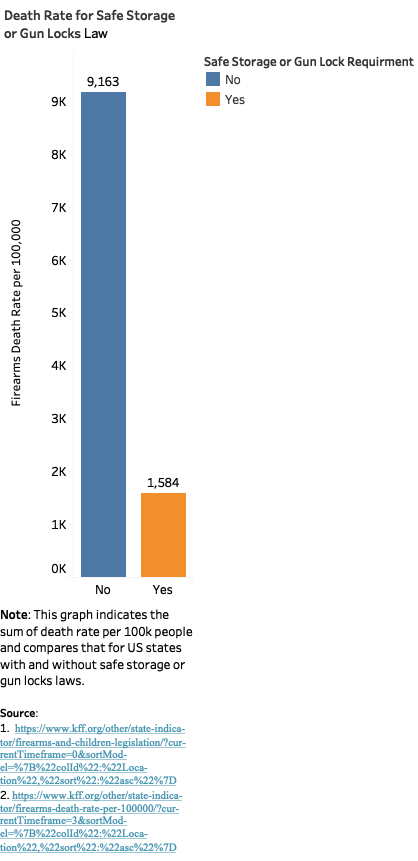

In [47]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/3_SafeStorageLawvsDeaths.png')

### Dashboard 3

**Firearm deaths are significantly lower in states with stricter gun control legislation.  There is a significant difference in the death rate in the states where laws related to Assault Weapons Ban and Safe Storage or Guns Locks exist vs the states where these laws do not exist.**

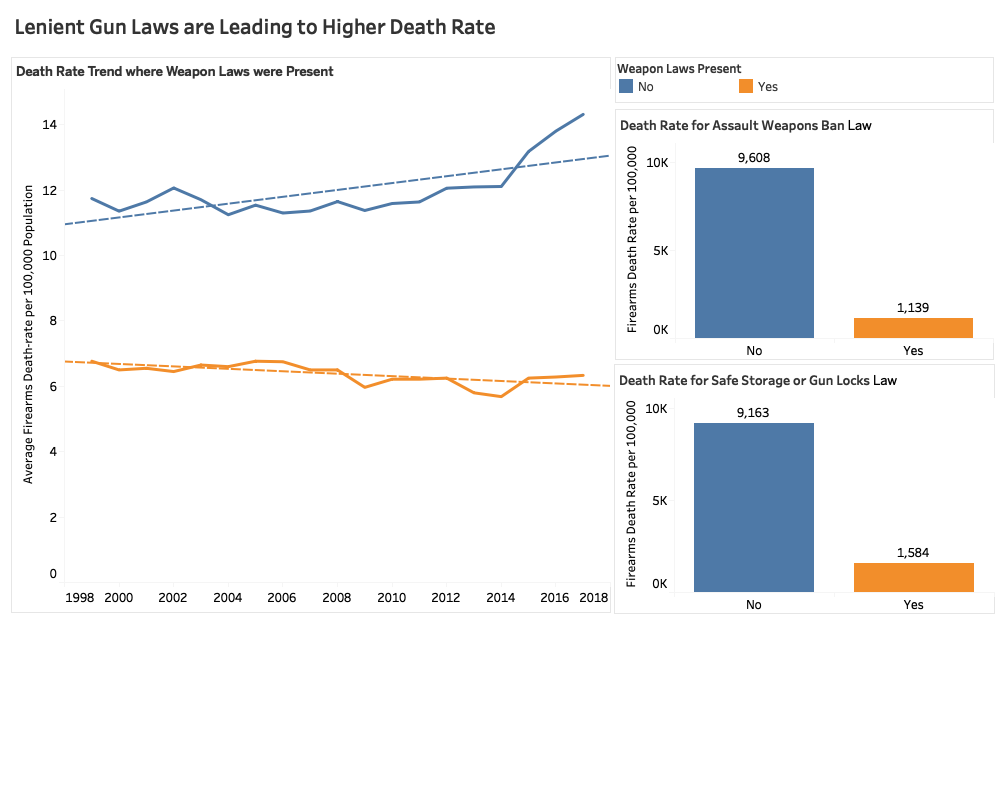

In [48]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/3_LawAnalysis.png', width = 1000)

Tableau Public Link: https://public.tableau.com/profile/prerana7302#!/vizhome/Gun_Violence_in_United_States/LawAnalysis

---

### Conclusion

We began our analysis by understanding the issue of gun violence across developed nations. We realized that United States, when compared to other developed nations has a very unique problem. It exceeded other developed nations with big margins when it came to both gun ownership by civilians as well as gun related deaths. We then delved deeper into the problem by exploring mass shootings that have become a frequent occurrence in United States and also the reasons behind these occurrences. We realized that a major contributing factor was the easy availability of legal guns in United States. Our intuition was that lenient gun-control laws could be a part of the problem. Hence, we decided to compare the average death rate trend in US States where gun-control laws were and were not implemented. We found that in States where gun-control laws were implemented average death rate was declining steadily. Also, there was a significant increase in average death rate over the years were gun-control laws were not implemented. 

From this analysis, we conclude that stricter gun-control laws could decrease the frequency of gun-related incidents and also reduce the overall death rate due to gun-violence.

The Tableau Public Link for all the charts and dashboards is here.(https://public.tableau.com/profile/prerana7302#!/vizhome/Gun_Violence_in_United_States/LawAnalysis)

---

## References

* America’s unique gun violence problem, explained in 17 maps and charts 
https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts

* Gun homicides and gun ownership listed by country 
https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data

* Developed Countries 2019
http://worldpopulationreview.com/countries/developed-countries/

* Gun Violence Archive (GVA) 
https://www.gunviolencearchive.org/

* 1000 Largest US Cities By Population With Geographic Coordinates
https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/table/?sort=-rank

* US Mass Shootings, 1982-2019: Data From Mother Jones’ Investigation 
https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

* Harvard Injury Control Research Center
https://www.hsph.harvard.edu/hicrc/firearms-research/guns-and-death/

* States with Firearm Laws Designed to Protect Children
https://www.kff.org/other/state-indicator/firearms-and-children-legislation/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

* Number of Deaths Due to Injury by Firearms per 100,000 Population
https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=3&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

* Nearly 40,000 People Died From Guns in U.S. Last Year, Highest in 50 Years
https://www.nytimes.com/2018/12/18/us/gun-deaths.html

* The Geography of Gun Deaths https://www.theatlantic.com/national/archive/2011/01/the-geography-of-gun-deaths/69354/
